In [1]:
# 한글 글꼴 설정
plt.rcParams["font.family"] = 'NanumGothicCoding'

### 데이터불러오기

In [2]:
df = pd.read_csv("final_navertv2.csv", index_col=0)
df.tail()

,count,like,link,program,title,crawling_day,crawling_time,genre,personal
3125,"152,033",237,https://tv.naver.com/v/13532137/list/67096,리그 오브 레전드 네이버스포츠,GEN vs T1 2세트,2020.05.01,1,기타,0
3126,"14,604",79,https://tv.naver.com/v/13596852/list/67096,라디오스타,＂결혼합시다.♥＂ 두 번째 만남에 프러포즈한 봉태규,2020.05.01,1,예능,0
3127,"10,094",15,https://tv.naver.com/v/13592216/list/67096,리그 오브 레전드 네이버스포츠,DYN vs SRB 2세트,2020.05.01,1,기타,0
3128,"105,788","2,558",https://tv.naver.com/v/13506581/list/67096,신청곡을 불러드립니다-사랑의 콜센타,김희재 ‘J에게’♪ 모녀에게 바치는 희.J.세레나데~♡,2020.05.01,1,예능,0
3129,"36,859",301,https://tv.naver.com/v/13590510/list/67096,KBO리그 키움 홈경기 영상,"[전체HL] '15안타 폭발' 키움, 두산 상대로 승리하며 연습 경기 3연승 질주",2020.05.01,1,스포츠,0


### 장르별 비율

In [4]:
df['count'] = 1
df_gb = df.groupby('genre').count()
df_gb = df_gb.sort_values('count', ascending=False)

In [5]:
# information of groups
group_names = ['예능', '드라마', '뉴스', '스포츠', '기타', '교양']
group_sizes = df_gb['count']
group_explodes = (0, 0, 0, 0, 0, 0)

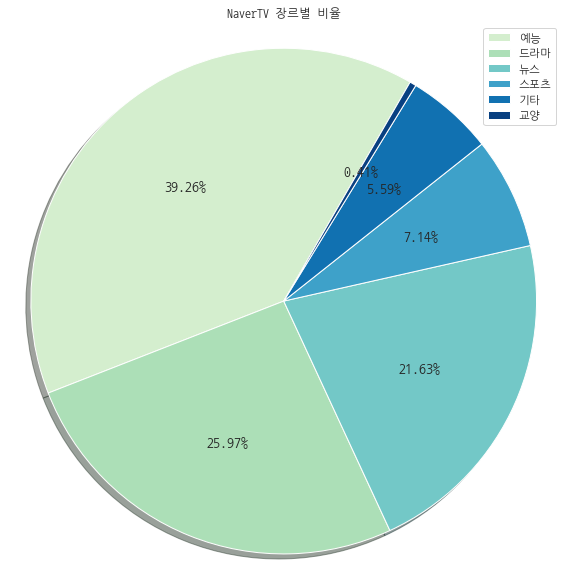

In [6]:
# Pie chart
%matplotlib inline
plt.figure(figsize=(8, 8))
plt.pie(group_sizes,
        explode=group_explodes,
        # labels=group_names,
        autopct='%1.2f%%',  # second decimal place
        shadow=True,
        startangle=60,
        textprops={'fontsize': 14},  # text font size
        colors=plt.cm.GnBu(np.linspace(0.2, 1, 6)))
plt.axis('equal')  # equal lenght of X and Y axis
plt.legend(group_names)
plt.tight_layout()
plt.title("NaverTV 장르별 비율")
plt.show()

### 예능 인기프로그램

In [11]:
df_ent = df[df['genre'] == '예능']
df_ent = df_ent.groupby('program').count().sort_values(
    'count', ascending=False)['count']

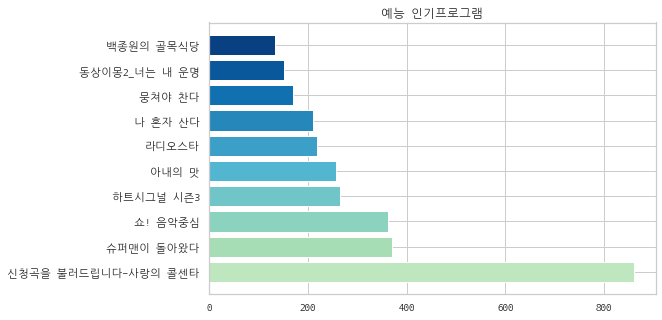

In [12]:
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.barh(np.arange(len(df_ent[:10])), df_ent[:10], align='center',
         color=plt.cm.GnBu(np.linspace(0.3, 1, 10)))
plt.yticks(np.arange(len(df_ent[:10])), df_ent.index)
plt.title("예능 인기프로그램")
plt.show()

### 드라마 인기프로그램

In [13]:
df_drama = df[df['genre'] == '드라마']
df_drama = df_drama.groupby('program').count().sort_values(
    'count', ascending=False)['count']

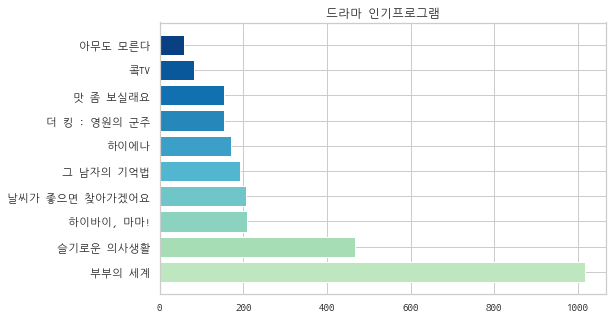

In [15]:
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.barh(np.arange(len(df_drama[:10])), df_drama[:10], align='center',
         color=plt.cm.GnBu(np.linspace(0.3, 1, 10)))
plt.yticks(np.arange(len(df_drama[:10])), df_drama.index)
plt.title("드라마 인기프로그램")
plt.show()

### 뉴스 인기프로그램

In [17]:
df_news = df[df['genre'] == '뉴스']
df_news = df_news.groupby('program').count().sort_values(
    'count', ascending=False)['count']

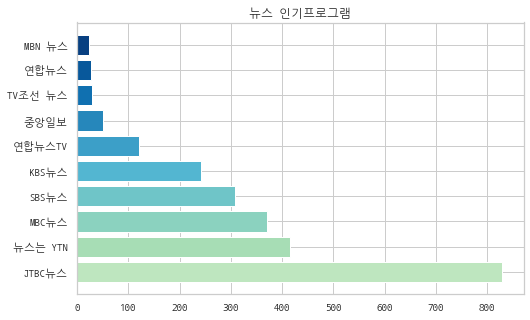

In [19]:
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.barh(np.arange(len(df_news[:10])), df_news[:10], align='center',
         color=plt.cm.GnBu(np.linspace(0.3, 1, 10)))
plt.yticks(np.arange(len(df_news[:10])), df_news.index)
plt.title("뉴스 인기프로그램")
plt.show()

### 시간대별 인기장르

In [21]:
df_01 = df[df['crawling_time'] == 1]
df_01 = df_01.groupby('genre').count().sort_values('count', ascending=False)

df_09 = df[df['crawling_time'] == 9]
df_09 = df_09.groupby('genre').count().sort_values('count', ascending=False)

df_14 = df[df['crawling_time'] == 14]
df_14 = df_14.groupby('genre').count().sort_values('count', ascending=False)

df_19 = df[df['crawling_time'] == 19]
df_19 = df_19.groupby('genre').count().sort_values('count', ascending=False)

In [22]:
# 바차트 꾸미기 설정
import numpy as np

# xtick 위치 잡아주는 함수
def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

# height 설정하는 함수
def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.1f' %
                height, rotation=90, ha='center', va='bottom')

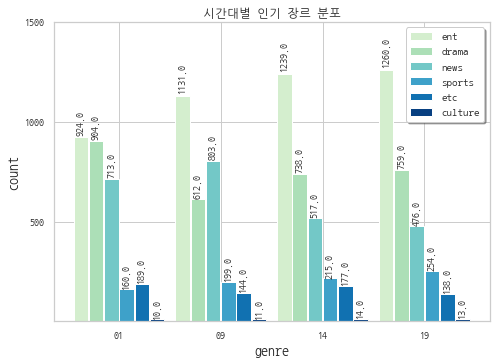

In [24]:
# bar plot으로 나타낼 데이터
models = ['ent', 'drama', 'news', 'sports', 'etc', 'culture']
xticks = ['01', '09', '14', '19']
data = {'ent': [df_01.loc['예능']['count'], df_09.loc['예능']['count'],
                df_14.loc['예능']['count'], df_19.loc['예능']['count']],
        'drama': [df_01.loc['드라마']['count'], df_09.loc['드라마']['count'],
                  df_14.loc['드라마']['count'], df_19.loc['드라마']['count']],
        'news': [df_01.loc['뉴스']['count'], df_09.loc['뉴스']['count'],
                 df_14.loc['뉴스']['count'], df_19.loc['뉴스']['count']],
        'sports': [df_01.loc['스포츠']['count'], df_09.loc['스포츠']['count'],
                   df_14.loc['스포츠']['count'], df_19.loc['스포츠']['count']],
        'etc': [df_01.loc['기타']['count'], df_09.loc['기타']['count'],
                df_14.loc['기타']['count'], df_19.loc['기타']['count']],
        'culture': [df_01.loc['교양']['count'], df_09.loc['교양']['count'],
                    df_14.loc['교양']['count'], df_19.loc['교양']['count']]}

# matplotlib의 figure 및 axis 설정
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
colors = plt.cm.GnBu(np.linspace(0.2, 1, 6))
width = 0.15

# bar 그리기
for i, model in enumerate(models):
    pos = compute_pos(xticks, width, i, models)
    bar = ax.bar(pos, data[model], width=width *
                 0.95, label=model, color=colors[i])
    present_height(ax, bar)

# x축 세부설정
ax.set_xticks(range(len(xticks)))
ax.set_xticklabels(xticks, fontsize=10)
ax.set_xlabel('genre', fontsize=14)

# y축 세부설정
ax.set_ylim([0, 1500])
ax.set_yticks([500, 1000, 1500])
ax.yaxis.set_tick_params(labelsize=10)
ax.set_ylabel('count', fontsize=14)

# 범례 나타내기
ax.legend(loc='upper right', shadow=True, ncol=1)

# 그래프 저장하고 출력하기
plt.tight_layout()
plt.title("시간대별 인기 장르 분포")
plt.show()